In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from ga import GA
from graph import Graph

In [103]:
g = Graph.from_file("instances/myciel4.col")
nb_runs = 50
population_size = 50
max_generations = 120

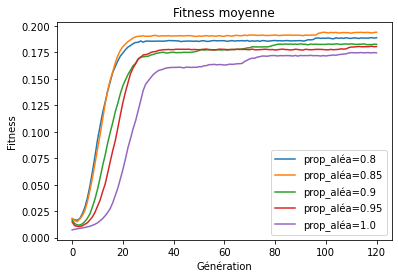

In [65]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
rand_proportions = np.arange(0.8, 1.01, 0.05).round(2)
f = open("ga_concepts/parameters/rand_proportions_tmp.npy", "wb")
for rand_proportion in rand_proportions:
    total_avgs_fitness = np.zeros(max_generations + 1)
    for _ in range(nb_runs):
        col = GA(
            g,
            rand_proportion=rand_proportion,
            max_generations=max_generations
        )
        gens_info, t = col.solve()
        total_avgs_fitness += np.array(gens_info[3])
    total_avgs_fitness /= nb_runs
    np.save(f, total_avgs_fitness)
    ax.plot(x, total_avgs_fitness, label=f"prop_aléa={rand_proportion}")
f.close()
ax.set_title("Fitness moyenne")
ax.set_xlabel("Génération")
ax.set_ylabel("Fitness")
ax.legend()
fig.savefig("ga_concepts/parameters/rand_proportions_tmp.pdf", bbox_inches="tight")

In [121]:
rand_proportion = 0.85

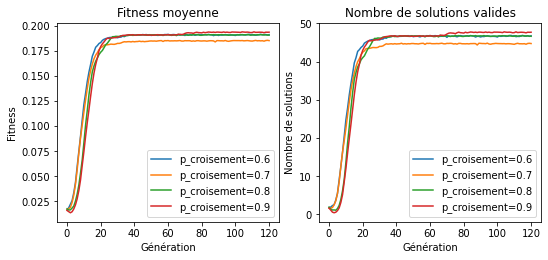

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(7.5, 3.5), constrained_layout=True)
x = np.arange(0, max_generations + 1)
crossover_rates = np.arange(0.6, 0.91, 0.1).round(2)
f = open("ga_concepts/parameters/crossover_rates_tmp.npy", "wb")
for crossover_rate in crossover_rates:
    total_nb_solutions = np.zeros(max_generations + 1)
    total_avgs_fitness = np.zeros(max_generations + 1)
    for _ in range(nb_runs):
        col = GA(
            g,
            rand_proportion=rand_proportion,
            crossover_rate=crossover_rate,
            max_generations=max_generations
        )
        gens_info, t = col.solve()
        total_nb_solutions += np.array(gens_info[2])
        total_avgs_fitness += np.array(gens_info[3])
    total_nb_solutions /= nb_runs
    total_avgs_fitness /= nb_runs
    np.save(f, total_nb_solutions)
    np.save(f, total_avgs_fitness)
    ax[1].plot(x, total_nb_solutions, label=f"p_croisement={crossover_rate}")
    ax[0].plot(x, total_avgs_fitness, label=f"p_croisement={crossover_rate}")
f.close()
ax[1].set_title("Nombre de solutions valides")
ax[1].set_xlabel("Génération")
ax[1].set_ylabel("Nombre de solutions")
ax[1].legend()
ax[0].set_title("Fitness moyenne")
ax[0].set_xlabel("Génération")
ax[0].set_ylabel("Fitness")
ax[0].legend()
fig.savefig("ga_concepts/parameters/crossover_rates_tmp.pdf", bbox_inches="tight")

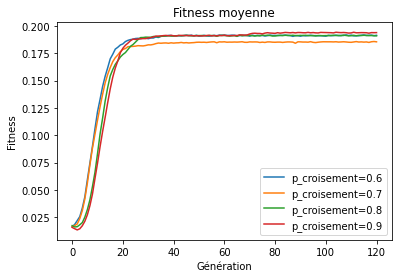

In [28]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
with open("ga_concepts/parameters/crossover_rates.npy", "rb") as f:
    for crossover_rate in crossover_rates:
        total_nb_solutions = np.load(f)
        total_avgs_fitness = np.load(f)
        ax.plot(x, total_avgs_fitness, label=f"p_croisement={crossover_rate}")
    ax.set_title("Fitness moyenne")
    ax.set_xlabel("Génération")
    ax.set_ylabel("Fitness")
    ax.legend()
    fig.savefig("ga_concepts/parameters/crossover_rates_light.pdf", bbox_inches="tight")

In [122]:
crossover_rate = 0.9

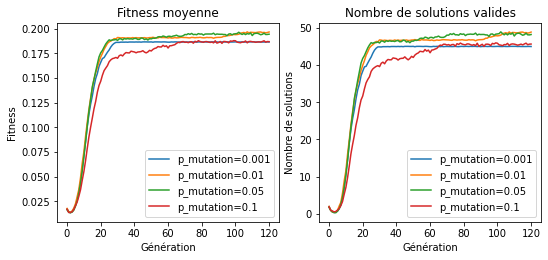

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(7.5, 3.5), constrained_layout=True)
x = np.arange(0, max_generations + 1)
mutation_rates = [0.001, 0.01, 0.05, 0.1]
f = open("ga_concepts/parameters/mutation_rates_tmp.npy", "wb")
for mutation_rate in mutation_rates:
    total_nb_solutions = np.zeros(max_generations + 1)
    total_avgs_fitness = np.zeros(max_generations + 1)
    for _ in range(nb_runs):
        col = GA(
            g,
            rand_proportion=rand_proportion,
            crossover_rate=crossover_rate,
            mutation_rate=mutation_rate,
            max_generations=max_generations
        )
        gens_info, t = col.solve()
        total_nb_solutions += np.array(gens_info[2])
        total_avgs_fitness += np.array(gens_info[3])
    total_nb_solutions /= nb_runs
    total_avgs_fitness /= nb_runs
    np.save(f, total_nb_solutions)
    np.save(f, total_avgs_fitness)
    ax[1].plot(x, total_nb_solutions, label=f"p_mutation={mutation_rate}")
    ax[0].plot(x, total_avgs_fitness, label=f"p_mutation={mutation_rate}")
f.close()
ax[1].set_title("Nombre de solutions valides")
ax[1].set_xlabel("Génération")
ax[1].set_ylabel("Nombre de solutions")
ax[1].legend()
ax[0].set_title("Fitness moyenne")
ax[0].set_xlabel("Génération")
ax[0].set_ylabel("Fitness")
ax[0].legend()
fig.savefig("ga_concepts/parameters/mutation_rates_tmp.pdf", bbox_inches="tight")

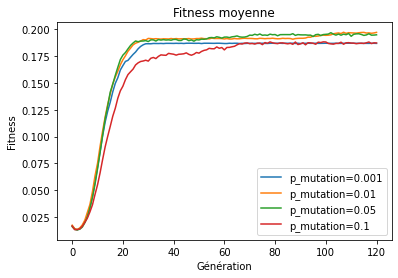

In [54]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
with open("ga_concepts/parameters/mutation_rates.npy", "rb") as f:
    for mutation_rate in mutation_rates:
        total_nb_solutions = np.load(f)
        total_avgs_fitness = np.load(f)
        ax.plot(x, total_avgs_fitness, label=f"p_mutation={mutation_rate}")
    ax.set_title("Fitness moyenne")
    ax.set_xlabel("Génération")
    ax.set_ylabel("Fitness")
    ax.legend()
    fig.savefig("ga_concepts/parameters/mutation_rates_light.pdf", bbox_inches="tight")

In [123]:
mutation_rate = 0.01

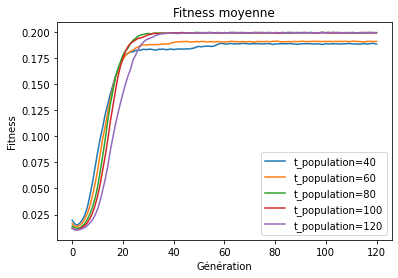

In [6]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
population_sizes = range(40, 121, 20)
f = open("ga_concepts/parameters/population_sizes_tmp.npy", "wb")
for population_size in population_sizes:
    total_avgs_fitness = np.zeros(max_generations + 1)
    for _ in range(nb_runs):
        col = GA(
            g,
            population_size=population_size,
            rand_proportion=rand_proportion,
            crossover_rate=crossover_rate,
            mutation_rate=mutation_rate,
            max_generations=max_generations
        )
        gens_info, t = col.solve()
        total_avgs_fitness += np.array(gens_info[3])
    total_avgs_fitness /= nb_runs
    np.save(f, total_avgs_fitness)
    ax.plot(x, total_avgs_fitness, label=f"t_population={population_size}")
f.close()
ax.set_title("Fitness moyenne")
ax.set_xlabel("Génération")
ax.set_ylabel("Fitness")
ax.legend()
fig.savefig("ga_concepts/parameters/population_sizes_tmp.pdf", bbox_inches="tight")

In [124]:
population_size = 80

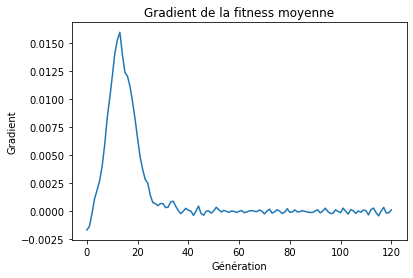

In [100]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
f = open("ga_concepts/parameters/max_generations_effect_tmp.npy", "wb")
total_avgs_fitness = np.zeros(max_generations + 1)
for _ in range(nb_runs):
    col = GA(
        g,
        population_size=population_size,
        rand_proportion=rand_proportion,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        max_generations=max_generations
    )
    gens_info, t = col.solve()
    total_avgs_fitness += np.array(gens_info[3])
total_avgs_fitness /= nb_runs
avgs_fitness_gradient = np.gradient(total_avgs_fitness)
np.save(f, avgs_fitness_gradient)
ax.plot(x, avgs_fitness_gradient)
f.close()
ax.set_title("Gradient de la fitness moyenne")
ax.set_xlabel("Génération")
ax.set_ylabel("Gradient")
fig.savefig("ga_concepts/parameters/max_generations_effect_tmp.pdf", bbox_inches="tight")

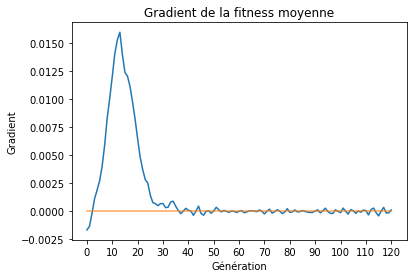

In [117]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
with open("ga_concepts/parameters/max_generations_effect.npy", "rb") as f:
    avgs_fitness_gradient = np.load(f)
    ax.plot(x, avgs_fitness_gradient)
    ax.set_title("Gradient de la fitness moyenne")
    ax.set_xlabel("Génération")
    ax.set_ylabel("Gradient")
    ax.plot(x, np.zeros(max_generations + 1), alpha=0.7)
    ax.set_xticks(np.arange(0, max_generations+1, 10))
    fig.savefig("ga_concepts/parameters/max_generations_effect_dec.pdf", bbox_inches="tight")

In [125]:
max_generations = 35